In [4]:
import librosa
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.ndimage import rotate
import tensorflow_addons as tfa

# Data Augmentation

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

num_valid = 5000

X_valid = X_train[:num_valid]
Y_valid = Y_train[:num_valid]
X_train = X_train[num_valid:]
Y_train = Y_train[num_valid:]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1.0/127.5, offset=-1.0, input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(10, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(10, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Accuracy = model.fit(X_train, Y_train,
                     epochs=200,
                     validation_data=(X_valid, Y_valid)
                     )

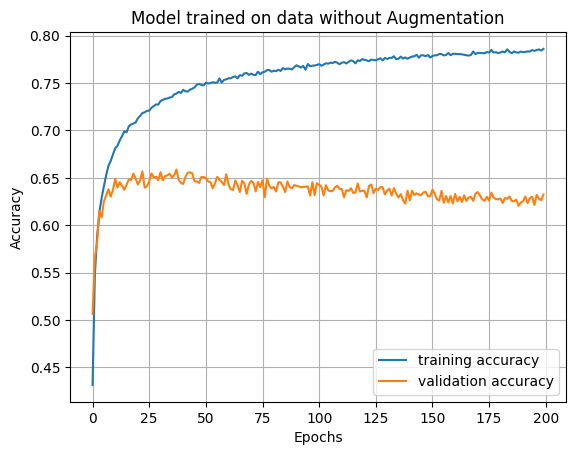

In [ ]:
# Plot of the validation accuracy over epochs
plt.figure()
plt.plot(Accuracy.history['accuracy'], label='training accuracy')
plt.plot(Accuracy.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.title('Model trained on data without Augmentation')
plt.legend()
plt.show()

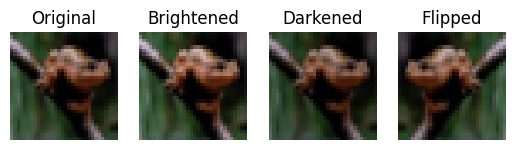

In [ ]:
Aug_data_1 = np.minimum(1.1 * X_train/255, 1.0) # Augmented Dataset 1
Aug_data_2 = 0.9 * X_train/255                  # Augmented Dataset 2
Aug_data_3 = np.flip(X_train/255, axis=2)       # Augmented Dataset 3

image = 0

plt.figure()
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(X_train[image])
plt.axis('off')

# Brightened Image
plt.subplot(1, 4, 2)
plt.title("Brightened")
plt.imshow(Aug_data_1[image])
plt.axis('off')

# Darkened Image
plt.subplot(1, 4, 3)
plt.title("Darkened")
plt.imshow(Aug_data_2[image])
plt.axis('off')

# Horizontal flipped Image
plt.subplot(1, 4, 4)
plt.title("Flipped")
plt.imshow(Aug_data_3[image])
plt.axis('off')

plt.show()

In [ ]:
Aug_X_train = np.concatenate([Aug_data_1, Aug_data_2, Aug_data_3, X_train/255], axis=0)
Aug_X_train = Aug_X_train * 255
Aug_Y_train = np.concatenate([Y_train] * 4, axis=0)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1.0/127.5, offset=-1.0, input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(10, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(10, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(10, activation='softmax')
])

learning_rate=0.001 # Working better
# learning_rate=0.003

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# BATCH_SIZE = 32
BATCH_SIZE = 200

Accuracy_1 = model.fit(Aug_X_train, Aug_Y_train,
                     epochs=200,
                     batch_size = BATCH_SIZE,
                     validation_data=(X_valid, Y_valid)
                     )

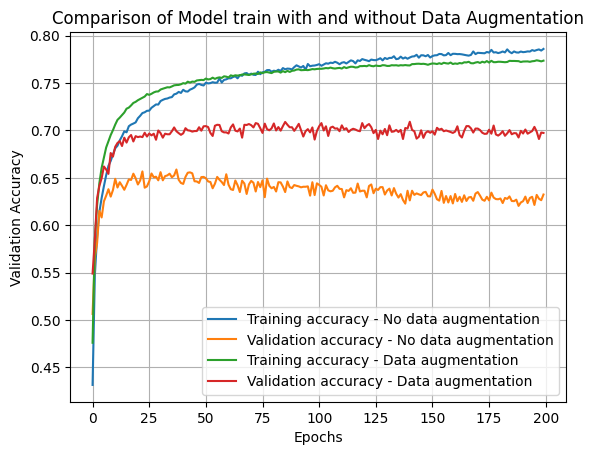

In [ ]:
# Plot of the validation accuracy over epochs
plt.figure()
plt.plot(Accuracy.history['accuracy'], label='Training accuracy - No data augmentation')
plt.plot(Accuracy.history['val_accuracy'], label='Validation accuracy - No data augmentation')
plt.plot(Accuracy_1.history['accuracy'], label='Training accuracy - Data augmentation')
plt.plot(Accuracy_1.history['val_accuracy'], label='Validation accuracy - Data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.title('Comparison of Model train with and without Data Augmentation')
plt.legend()
plt.show()